In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

%config InlineBackend.figure_formats = {'png', 'retina'}  # for high-reso graph
# plt.rcParams['font.family'] = 'Yu Mincho' # for Japanese in graph (Win)
#plt.rcParams['font.family'] = 'IPAexGothic' # for Japanese in graph (Mac)
plt.rcParams['font.family'] = 'Noto Sans' # for Japanese in graph (Mac)

In [2]:
csv_in='Kuramoto_1.csv'
df = pd.read_csv(csv_in,  skiprows=0, header=0, encoding='shift_jis')
print(df.shape)
print(df.info())
display(df.head())

(60, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   建築年代    60 non-null     object 
 1   構造      60 non-null     object 
 2   被害度合    60 non-null     object 
 3   割合      60 non-null     float64
dtypes: float64(1), object(3)
memory usage: 2.0+ KB
None


,建築年代,構造,被害度合,割合
0,1981年5月,木造,無被害,0.05
1,1981年5月,木造,軽微,0.49
2,1981年5月,木造,大破,0.18
3,1981年5月,木造,倒壊,0.28
4,1981年6月?2000年5月,木造,無被害,0.20


In [3]:
df_wood= df[df['構造']=='木造']
display(df_wood)

,建築年代,構造,被害度合,割合
0,1981年5月,木造,無被害,0.05
1,1981年5月,木造,軽微,0.49
2,1981年5月,木造,大破,0.18
3,1981年5月,木造,倒壊,0.28
4,1981年6月?2000年5月,木造,無被害,0.20
5,1981年6月?2000年5月,木造,軽微,0.61
6,1981年6月?2000年5月,木造,大破,0.10
7,1981年6月?2000年5月,木造,倒壊,0.09
8,2000年6月?,木造,無被害,0.61
9,2000年6月?,木造,軽微,0.33


In [4]:
df2 = df_wood[['建築年代','被害度合','割合']]
display(df2)

,建築年代,被害度合,割合
0,1981年5月,無被害,0.05
1,1981年5月,軽微,0.49
2,1981年5月,大破,0.18
3,1981年5月,倒壊,0.28
4,1981年6月?2000年5月,無被害,0.20
5,1981年6月?2000年5月,軽微,0.61
6,1981年6月?2000年5月,大破,0.10
7,1981年6月?2000年5月,倒壊,0.09
8,2000年6月?,無被害,0.61
9,2000年6月?,軽微,0.33


In [5]:
pivot = pd.pivot_table(df2, values="割合", columns="被害度合", index='建築年代',aggfunc="sum")
display(pivot)

被害度合,倒壊,大破,無被害,軽微
建築年代,,,,
1981年5月,0.28,0.18,0.05,0.49
1981年6月?2000年5月,0.09,0.10,0.20,0.61
2000年6月?,0.02,0.04,0.61,0.33


[0 1 2]


TypeError: cannot unpack non-iterable numpy.int64 object

/home/iniad/Documents/INIAD2025/winter/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  func(*args, **kwargs)
/home/iniad/Documents/INIAD2025/winter/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  func(*args, **kwargs)
/home/iniad/Documents/INIAD2025/winter/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/iniad/Documents/INIAD2025/winter/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


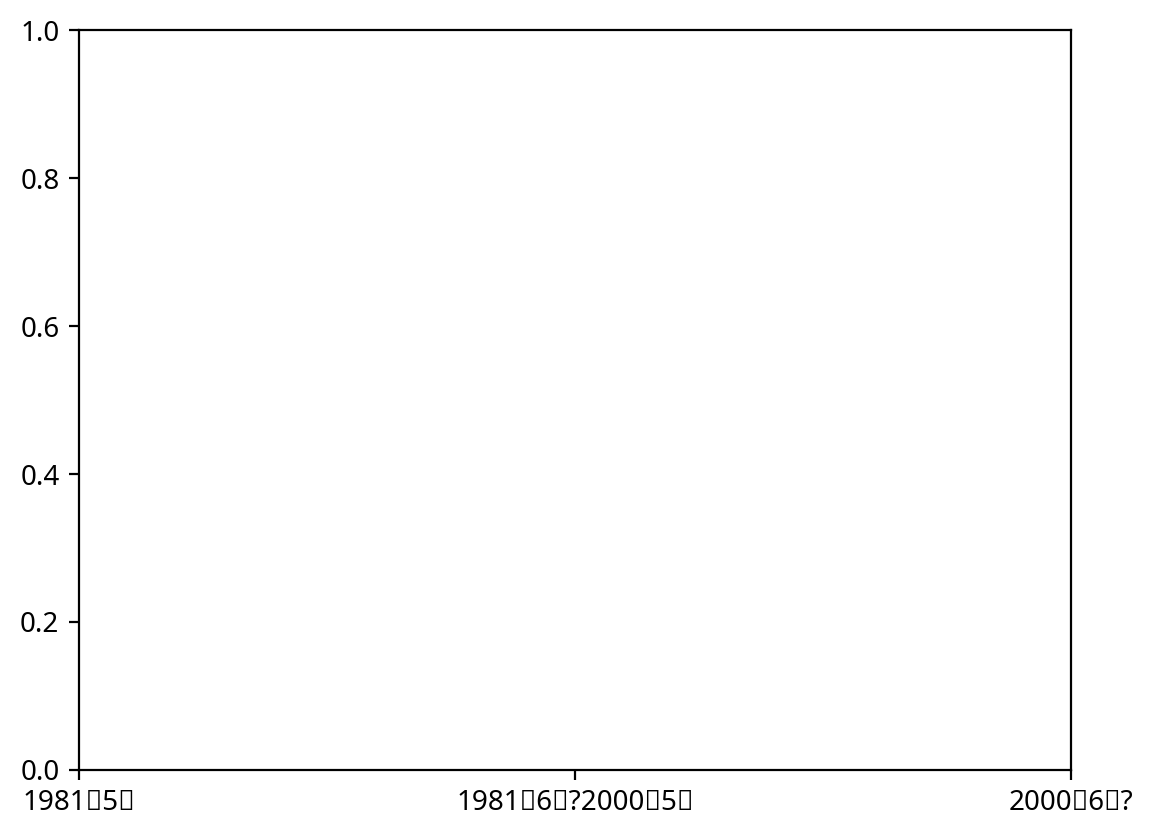

In [ ]:
height = np.zeros(pivot.shape[0])
X = np.array(range(pivot.shape[0]))
plt.xticks(X, pivot.index)
for i,r in zip(X, pivot:
    plt.bar(X, r, bottom=height, label=r.name)
    height+=r
plt.xlabel('Category')
plt.ylabel('Annual Spending (m.u.)')
plt.xticks(rotation=90)
plt.legend()
plt.show()